# Question 3
题目要求首先分析过去5年的数据走势，然后分别预测未来3年的宠物食物产量和出口量

## 分析过去5年的数据走势
这里首先分析了中国宠物食品总产值（人民币 亿）`pet_food_output_value`和中国宠物食品出口总值（美元 亿）`pet_food_export_value`的历史数据走势，并绘制了折线图，观察其二者有没有什么联系。
其次，分析了

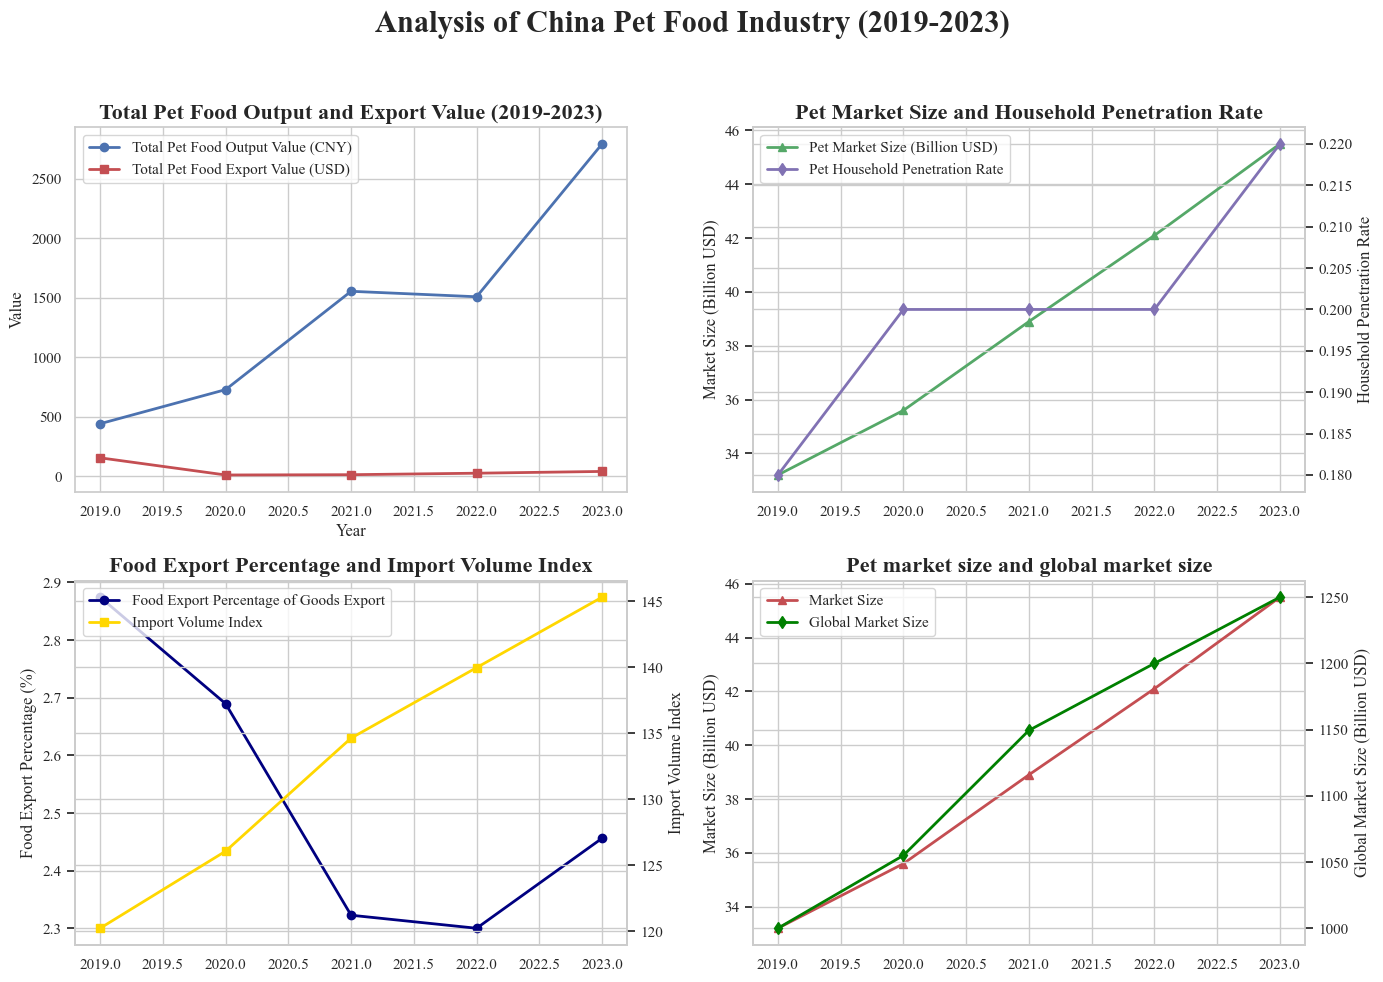

Correlation with Total Pet Food Output Value:
                        Correlation_Coefficients
Pet_Count                               0.945365
Market_Size                             0.955426
Household_Penetration                   0.908976
Food_Export_Percentage                 -0.658953
Import_Volume_Index                     0.942053
Population_Growth                      -0.936126
GDP_per_Capita                          0.819681
Global_Market_Size                      0.938685
energy_price_index                      0.734534
Correlation with Total Pet Food Export Value:
                        Correlation_Coefficients
Pet_Count                              -0.587632
Market_Size                            -0.511218
Household_Penetration                  -0.669797
Food_Export_Percentage                  0.732248
Import_Volume_Index                    -0.575373
Population_Growth                       0.590686
GDP_per_Capita                         -0.571555
Global_Market_Size        

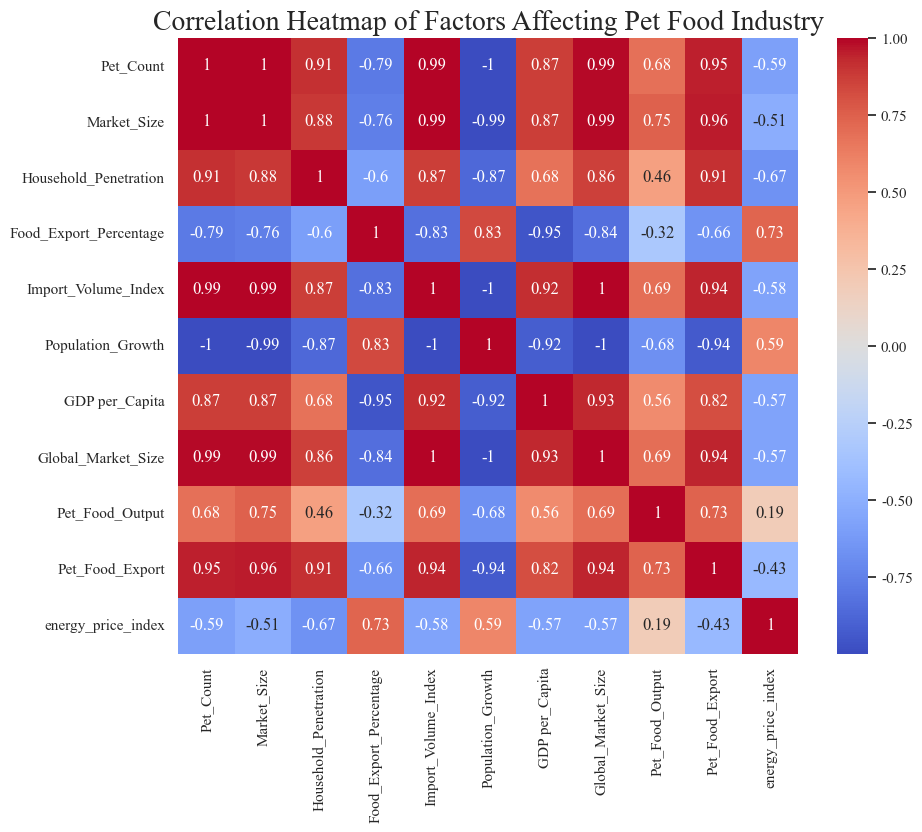

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 使用Times New Roman字体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
# 1. 数据定义
years = np.array([2019, 2020, 2021, 2022, 2023])  # 历史年份
pet_count = np.array([99.8, 108.5, 115.4, 122.6, 130.2])  # 宠物数量（百万）
pet_food_output_value = np.array([440.7, 727.3, 1554, 1508, 2793])  # 中国宠物食品总产值（人民币 亿）
pet_food_export_value = np.array([154.1, 9.8, 12.2, 24.7, 39.6])  # 中国宠物食品出口总值（美元 亿）
market_size = np.array([33.2, 35.6, 38.9, 42.1, 45.5])  # 宠物市场规模（美元 亿）
pet_household_penetration = np.array([0.18, 0.2, 0.2, 0.2, 0.22])  # 宠物家庭渗透率
food_export_percentage = np.array([2.8745, 2.6897, 2.3228, 2.3002, 2.4563])  # 食品出口占商品出口的百分比
import_volume_index = np.array([120.23, 126.07, 134.64, 139.98, 145.32])  # 进口物量指数
population_growth = np.array([0.3547, 0.2380, 0.0893, -0.0131, -0.1038])  # 人口增长率（年度百分比）
gdp_per_capita = np.array([10143.86, 10408.72, 12617.51, 12662.58, 12614.06])  # 人均GDP（现价美元）
global_market_size = np.array([1000, 1055, 1149.42, 1200, 1250])  # 全球市场规模（美元 亿）
energy_price_index = np.array([90, 85, 88, 92, 95])  # 能源价格指数
# 2. 数据可视化分析
plt.figure(figsize=(14, 10))

# 宠物食品总产值和出口总值
plt.subplot(2, 2, 1)
plt.plot(years, pet_food_output_value, '-o', label='Total Pet Food Output Value (CNY)', linewidth=2, markersize=6, color='b')
plt.plot(years, pet_food_export_value, '-s', label='Total Pet Food Export Value (USD)', linewidth=2, markersize=6, color='r')
plt.title('Total Pet Food Output and Export Value (2019-2023)',fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)

# 子图
plt.subplot(2, 2, 2)
# 市场规模和宠物家庭渗透率
# 第一条折线：市场规模
line1, = plt.plot(years, market_size, '-^', label='Pet Market Size (Billion USD)', linewidth=2, markersize=6, color='g')
plt.ylabel('Market Size (Billion USD)', fontsize=12) 
# 创建共享 x 轴的第二个 y 轴
ax2 = plt.gca().twinx()
# 第二条折线：家庭渗透率
line2, = ax2.plot(years, pet_household_penetration, '-d', label='Pet Household Penetration Rate', linewidth=2, markersize=6, color='m')
ax2.set_ylabel('Household Penetration Rate', fontsize=12)
# 添加标题和坐标轴标签
plt.title('Pet Market Size and Household Penetration Rate',fontsize=16, fontweight='bold')
plt.xlabel('Year')
# 添加网格线
plt.grid(True)
# 合并图例
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')  # 图例位置可以调整

# 食品出口占比和进口物量指数
# 子图
plt.subplot(2, 2, 3)
# 第一条折线：食品出口占比
line1, = plt.plot(years, food_export_percentage, '-o', label='Food Export Percentage of Goods Export', linewidth=2, markersize=6, color='navy')
plt.ylabel('Food Export Percentage (%)', fontsize=12)  # 左边 Y 轴标签
# 创建共享 x 轴的第二个 y 轴
ax2 = plt.gca().twinx()
# 第二条折线：进口物量指数
line2, = ax2.plot(years, import_volume_index, '-s', label='Import Volume Index', linewidth=2, markersize=6, color='gold')
ax2.set_ylabel('Import Volume Index', fontsize=12)  # 右边 Y 轴标签
# 添加标题和坐标轴标签
plt.title('Food Export Percentage and Import Volume Index',fontsize=16, fontweight='bold')
plt.xlabel('Year')
# 添加网格线
plt.grid(True)
# 合并图例
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')  # 图例位置为左上角


# 子图
plt.subplot(2, 2, 4)
# 绘制中国宠物市场规模
line1, = plt.plot(years, market_size, '-^', label='Market Size', linewidth=2, markersize=6, color='r')
plt.ylabel('Market Size (Billion USD)', fontsize=12)  # 左侧 Y 轴标签
# 创建共享 x 轴的右侧 Y 轴
ax2 = plt.gca().twinx()
# 绘制全球宠物市场规模
line2, = ax2.plot(years, global_market_size, '-d', label='Global Market Size', linewidth=2, markersize=6, color='green')
ax2.set_ylabel('Global Market Size (Billion USD)', fontsize=12)  # 右侧 Y 轴标签
# 设置标题和 X 轴标签
plt.title('Pet market size and global market size',fontsize=16, fontweight='bold')
plt.xlabel('Year')
# 合并图例
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')  # 图例显示在左上角

# 添加网格线
plt.grid(True)

# 总标题和布局调整
plt.suptitle('Analysis of China Pet Food Industry (2019-2023)', fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 3. 相关性分析
X = np.column_stack((pet_count, market_size, pet_household_penetration, food_export_percentage, import_volume_index, population_growth, gdp_per_capita, global_market_size,energy_price_index))

# 相关系数计算
corr_matrix_output = np.corrcoef(np.column_stack((X, pet_food_output_value)).T)[-1, :-1]
corr_matrix_export = np.corrcoef(np.column_stack((X, pet_food_export_value)).T)[-1, :-1]

# 输出相关系数结果
output_corr_df = pd.DataFrame({'Correlation_Coefficients': corr_matrix_output},
                              index=['Pet_Count', 'Market_Size', 'Household_Penetration', 'Food_Export_Percentage', 'Import_Volume_Index', 'Population_Growth', 'GDP_per_Capita', 'Global_Market_Size','energy_price_index'])
export_corr_df = pd.DataFrame({'Correlation_Coefficients': corr_matrix_export},
                              index=['Pet_Count', 'Market_Size', 'Household_Penetration', 'Food_Export_Percentage', 'Import_Volume_Index', 'Population_Growth', 'GDP_per_Capita', 'Global_Market_Size','energy_price_index'])

print('Correlation with Total Pet Food Output Value:')
print(output_corr_df)

print('Correlation with Total Pet Food Export Value:')
print(export_corr_df)

# 4. 相关性热力图可视化
corr_matrix = np.corrcoef(np.column_stack((X, pet_food_output_value, pet_food_export_value)).T)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=['Pet_Count', 'Market_Size', 'Household_Penetration', 'Food_Export_Percentage', 'Import_Volume_Index', 'Population_Growth', 'GDP per_Capita', 'Global_Market_Size', 'Pet_Food_Output', 'Pet_Food_Export','energy_price_index'],
            yticklabels=['Pet_Count', 'Market_Size', 'Household_Penetration', 'Food_Export_Percentage', 'Import_Volume_Index', 'Population_Growth', 'GDP per_Capita', 'Global_Market_Size', 'Pet_Food_Output', 'Pet_Food_Export','energy_price_index'])
plt.title('Correlation Heatmap of Factors Affecting Pet Food Industry', fontsize=20)
plt.show()

# 5. 结论
# 宠物数量、市场规模和全球市场规模对中国宠物食品总产值和出口总值有明显的相关性，而人口增长率和家庭渗透率对于宠物食品的影响相对小。
# 市场规模也显示了进一步的增长，同时宠物家庭渗透率也有所提高。
# 宠物食品总产值在过去几年中显著增长，特别是在2021年到2023年之间，但出口总值在某些年度有所低起。
# 宠物市场随着国际市场的增长而增长，受到全球市场规模的影响。



# 预测未来产量+出口 of pet food industry
使用各个方法+权重优化
首先


Stopping search: maximum iterations reached --> 100
最优权重： [0. 0. 1. 0. 0. 0.]
最优MSE： 2116.0
最终模型的MSE： 2116.0


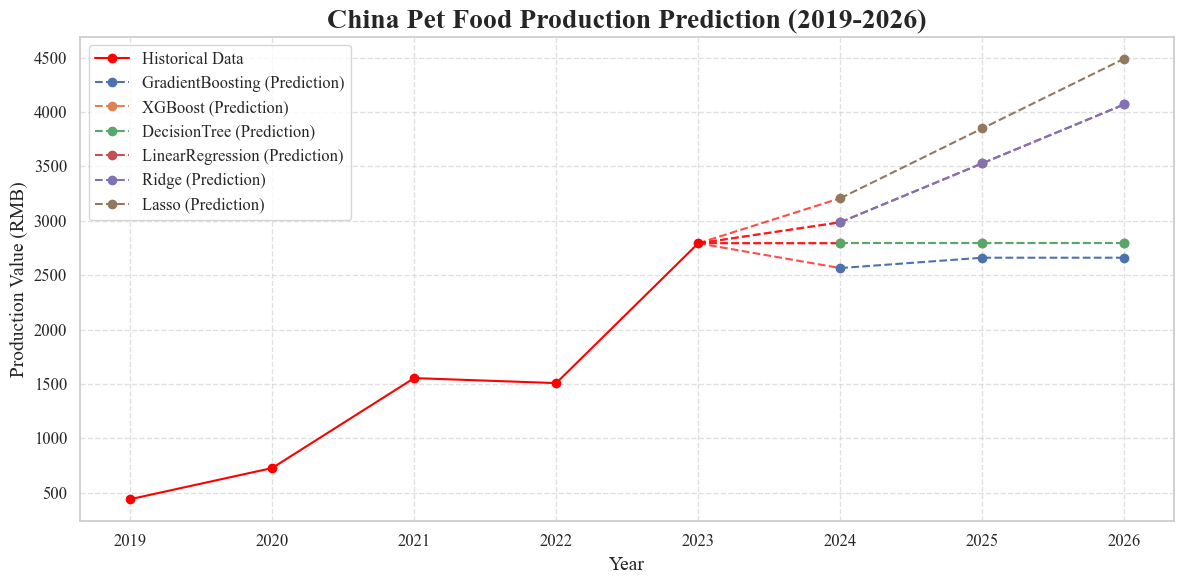

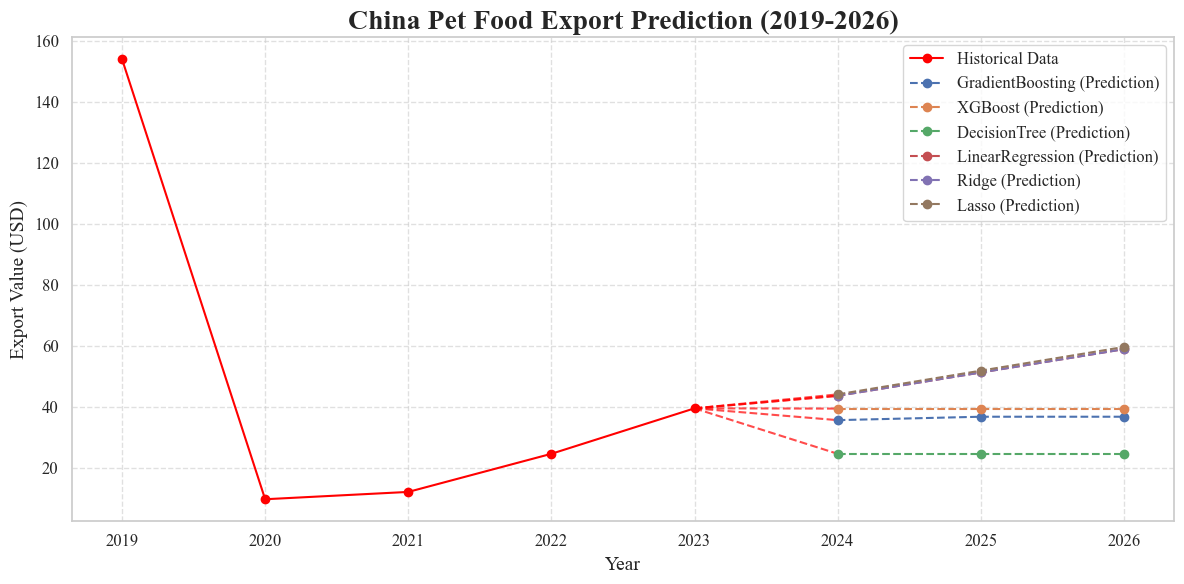


Future Predictions for China Pet Food Production (2024-2026):
Year 2024: {'GradientBoosting': 2565.420212672548, 'XGBoost': 2792.9604, 'DecisionTree': 2793.0, 'LinearRegression': 2986.2713293183715, 'Ridge': 2986.2675707391745, 'Lasso': 3207.0592516604142}
Year 2025: {'GradientBoosting': 2660.544582263362, 'XGBoost': 2792.9604, 'DecisionTree': 2793.0, 'LinearRegression': 3528.1280214451053, 'Ridge': 3528.122503609524, 'Lasso': 3848.8574511288607}
Year 2026: {'GradientBoosting': 2660.544582263362, 'XGBoost': 2792.9604, 'DecisionTree': 2793.0, 'LinearRegression': 4069.9847135718383, 'Ridge': 4069.9774364798736, 'Lasso': 4490.655650597308}

Future Predictions for China Pet Food Export (2024-2026):
Year 2024: {'GradientBoosting': 35.730655576197684, 'XGBoost': 39.511784, 'DecisionTree': 24.7, 'LinearRegression': 43.70303940912966, 'Ridge': 43.70298837857381, 'Lasso': 44.17841136873091}
Year 2025: {'GradientBoosting': 36.84958076935141, 'XGBoost': 39.511784, 'DecisionTree': 24.7, 'LinearRe

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
from pyswarm import pso  # 可用 pip 安装：pip install pyswarm
from sklearn.metrics import mean_squared_error
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 使用Times New Roman字体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
warnings.filterwarnings("ignore")

# sns.set_theme(style="whitegrid")

file_path = 'Data1.xlsx'
china_data = pd.read_excel(file_path, sheet_name='中国')

# 数据探索与预处理
features = ['中国宠物食品出口总值（美元）', '人口增长（年度百分比）', '农村人口', '出生人口性别比（每1000名男性的女性）',
            '向高收入经济体的商品出口（占商品出口总额的百分比）', '宠物市场规模 (亿美元)', '总税率（占商业利润的百分比）',
            '狗(万)', '网络影响力指数', '食品出口（占商品出口的百分比）']
# features = ['中国宠物食品出口总值（美元）','狗(万)']
features = []
# 初始化 Min-Max 标准化器
scaler = MinMaxScaler()
#china_data[features] = scaler.fit_transform(china_data[features])

target_production = '中国宠物食品总产值（人民币）'
target_export = '中国宠物食品出口总值（美元）'

# 新的特征数组
additional_data = {
    '宠物数量（百万）': [99.8, 108.5, 115.4, 122.6, 130.2],
    '中国宠物食品总产值（人民币 亿）': [440.7, 727.3, 1554, 1508, 2793],
    '中国宠物食品出口总值（美元 亿）': [154.1, 9.8, 12.2, 24.7, 39.6],
    '宠物市场规模（美元 亿）': [33.2, 35.6, 38.9, 42.1, 45.5],
    '宠物家庭渗透率': [0.18, 0.2, 0.2, 0.2, 0.22],
    '食品出口占比（百分比）': [2.8745, 2.6897, 2.3228, 2.3002, 2.4563],
    '进口物量指数': [120.23, 126.07, 134.64, 139.98, 145.32],
    # '人口增长率（年度百分比）': [0.3547, 0.2380, 0.0893, -0.0131, -0.1038],
    '人均GDP（现价美元）': [10143.86, 10408.72, 12617.51, 12662.58, 12614.06],
    '全球市场规模（美元 亿）': [1000, 1055, 1149.42, 1200, 1250],
    '能源价格指数': [90, 85, 88, 92, 95],
}
# 转换为 DataFrame
df = pd.DataFrame(additional_data)

# 初始化 Min-Max 标准化器
scaler = MinMaxScaler()

# 对每一列单独进行 Min-Max 标准化
# additional_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 将新特征加入到 DataFrame
for key, values in additional_data.items():
    china_data[key] = values

# 将新特征名称加入 features 列表
additional_features = list(additional_data.keys())
features.extend(additional_features)

X = china_data[features]
y_production = china_data[target_production]
y_export = china_data[target_export]

X.fillna(X.mean(), inplace=True)

# 差分特征
for feature in X.columns:
    X[f'{feature}_diff'] = X[feature].diff().fillna(0)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 创建一个空的 DataFrame 来保存未来的预测值
future_data_predictions = pd.DataFrame(columns=X.columns)

# 使用线性回归模型预测每个特征未来的三个值
for feature_idx, feature in enumerate(X.columns):
    y = X_normalized[:, feature_idx]  # 当前特征值
    X_time = np.arange(len(y)).reshape(-1, 1)  # 时间序列
    
    # 使用线性回归拟合
    lin_reg = LinearRegression()
    lin_reg.fit(X_time, y)
    
    # 预测未来三个时间点
    future_time = np.arange(len(y), len(y) + 3).reshape(-1, 1)
    future_predictions = lin_reg.predict(future_time)
    
    # 保存预测结果到 future_data_predictions
    future_data_predictions[feature] = future_predictions

# 将 future_data_predictions 转换为 NumPy 数组，用于模型预测
future_data = future_data_predictions.values


X_train, X_test, y_train_prod, y_test_prod = train_test_split(X_normalized[1:], y_production[1:], test_size=0.25, random_state=42)
_, _, y_train_exp, y_test_exp = train_test_split(X_normalized[1:], y_export[1:], test_size=0.25, random_state=42)

# 模型字典
models = {
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    #'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse'),
    #'LightGBM': LGBMRegressor(random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42)
}

# 参数网格字典
param_grid = {
    'GradientBoosting': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 4]},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [3, 5]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'DecisionTree': {'max_depth': [5, 10, 20]},
    'LinearRegression': {},  # 无需调参
    'Ridge': {'alpha': [1e-5, 1e-3, 1e-1, 1, 10, 100]},
    'Lasso': {'alpha': [0.01, 0.1, 1, 10]}   # 套索回归的正则化参数 alpha
}

best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=3,
                               scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train_prod)
    best_models[name] = grid_search.best_estimator_

# 获取每个模型的预测
model_predictions = {}
for name, model in best_models.items():
    model.fit(X_train, y_train_prod)
    model_predictions[name] = model.predict(X_test)

# 将模型预测值转换为 NumPy 数组（列表示每个模型的预测）
predictions_array = np.array(list(model_predictions.values())).T

# 定义目标函数（MSE）
def objective_function(weights):
    # 归一化权重，使其总和为1
    weights = np.array(weights)
    weights /= weights.sum()
    
    # 加权预测值
    weighted_prediction = np.dot(predictions_array, weights)
    
    # 计算均方误差（MSE）
    mse = mean_squared_error(y_test_prod, weighted_prediction)
    return mse

# 定义PSO的边界和初始参数
num_models = len(best_models)
lb = [0] * num_models  # 权重下界
ub = [1] * num_models  # 权重上界

# 运行粒子群优化
best_weights, best_mse = pso(objective_function, lb, ub, swarmsize=50, maxiter=100)

# 输出最优结果
print("最优权重：", best_weights / best_weights.sum())
print("最优MSE：", best_mse)

# 加权预测
optimal_weights = best_weights / best_weights.sum()  # 归一化权重
final_prediction = np.dot(predictions_array, optimal_weights)

# 计算最终的评估指标
final_mse = mean_squared_error(y_test_prod, final_prediction)
print("最终模型的MSE：", final_mse)




# 未来预测
years_extended = np.append(china_data['宠物/年份'], [2024, 2025, 2026])
future_predictions = {name: [] for name in models}

for name, model in best_models.items():
    #future_data = X_normalized[-1].reshape(1, -1)
    for i in range(3):
        next_year_pred = model.predict(future_data)[i]
        future_predictions[name].append(next_year_pred)
        # future_data = np.append(future_data[:, 1:], [[next_year_pred]], axis=1)

# 绘图：生产总值
plt.figure(figsize=(12, 6))
# 绘制历史数据
plt.plot(years_extended[:len(y_production)], y_production, color='red', linestyle='-', marker='o', label='Historical Data')

# 绘制后3年预测数据并连接第5个点和第6个点
for name, preds in future_predictions.items():
    # 连线：历史数据的最后一个点和预测数据的第一个点
    plt.plot([years_extended[len(y_production) - 1], years_extended[len(y_production)]],
             [y_production.iloc[-1], preds[0]],
             linestyle='--', color='red', alpha=0.7)  # 红色虚线连接

    # 绘制预测数据
    plt.plot(years_extended[len(y_production):], preds, label=f"{name} (Prediction)", linestyle='--', marker='o')

plt.title("China Pet Food Production Prediction (2019-2026)", fontsize=20, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Production Value (RMB)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 对出口值重复同样的步骤
best_models_exp = {}
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=3,
                               scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train_exp)
    best_models_exp[name] = grid_search.best_estimator_

future_predictions_exp = {name: [] for name in models}

for name, model in best_models_exp.items():
    #future_data = X_normalized[-1].reshape(1, -1)
    for i in range(3):
        next_year_pred = model.predict(future_data)[i]
        future_predictions_exp[name].append(next_year_pred)
        # future_data = np.append(future_data[:, 1:], [[next_year_pred]], axis=1)

# 绘图：出口值
plt.figure(figsize=(12, 6))
# 绘制历史数据
plt.plot(years_extended[:len(y_export)], y_export, color='red', linestyle='-', marker='o', label='Historical Data')

# 绘制后3年预测数据并连接第5个点和第6个点
for name, preds in future_predictions_exp.items():
    # 连线：历史数据的最后一个点和预测数据的第一个点
    plt.plot([years_extended[len(y_export) - 1], years_extended[len(y_export)]],
             [y_export.iloc[-1], preds[0]],
             linestyle='--', color='red', alpha=0.7)  # 红色虚线连接

    # 绘制预测数据
    plt.plot(years_extended[len(y_export):], preds, label=f"{name} (Prediction)", linestyle='--', marker='o')

plt.title("China Pet Food Export Prediction (2019-2026)", fontsize=20, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Export Value (USD)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 输出未来预测值
print("\nFuture Predictions for China Pet Food Production (2024-2026):")
for year, preds in zip(range(2024, 2027), zip(*future_predictions.values())):
    print(f"Year {year}: {dict(zip(models.keys(), preds))}")

print("\nFuture Predictions for China Pet Food Export (2024-2026):")
for year, preds in zip(range(2024, 2027), zip(*future_predictions_exp.values())):
    print(f"Year {year}: {dict(zip(models.keys(), preds))}")
